
<font size="6" face="Calibri"><h1 style="color:green">
Focos de Tocantins em 2016<font size="1" face="Times"><h1 style="color:black">
elaborado por: ... Douglas Damião de Carvalho Honório ...<hr style="border:2px solid #0077b9;">

In [1]:
# encoding: utf-8

Para que o notebook IPython coloque as figuras geradas pela matplotlib inline:

In [2]:
%matplotlib inline

Bibliotecas

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


<font size="3" face="Times"><h1 style="color:black">Abrindo o arquivo Shape

In [4]:
focos = gpd.read_file(r"C:\Users\dougl\Desktop\programacao\focos_2016\focos_2016.shp")

In [5]:
focos["timestamp"] = pd.to_datetime(focos["DataHora"])

In [6]:
focos_tocantins = focos[focos.Estado == 'Tocantins']

In [7]:
focos_setembro = focos_tocantins[focos.timestamp.dt.month == 9]

C:\ProgramData\Anaconda2\lib\site-packages\geopandas\geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


<font size="3" face="Times"><h1 style="color:black">Testando o arquivo Shape

In [8]:
focos_setembro.head(4)

,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,geometry,timestamp
84977,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40,0.3,1.0,-8.048,-47.666,None,None,POINT (-47.666 -8.048),2016-09-01 16:04:38
84996,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40,0.3,1.0,-8.047,-47.670,None,None,POINT (-47.67 -8.047000000000001),2016-09-01 16:04:38
85000,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Almas,Cerrado,1,4.0,1.0,-11.907,-47.397,None,None,POINT (-47.397 -11.907),2016-09-01 16:04:38
85007,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Mateiros,Cerrado,4,0.6,1.0,-10.845,-46.636,None,None,POINT (-46.636 -10.845),2016-09-01 16:04:38


<font size="3" face="Times"><h1 style="color:black">Importando o Shapefile de municípios do IBGE:

In [9]:
municipios = gpd.read_file(r"C:\Users\dougl\Desktop\programacao\focos_2016\municipios\municipios.shp")

In [10]:
#17 é o código IBGE para o Estado de Tocantins
municipios_to = municipios[municipios["GEOCODIGO"].str[0:2] == "17"]

In [11]:
focos_setembro.crs = {'init': 'epsg:4674'}
municipios_to.crs = {'init': 'epsg:4674'}

<font size="3" face="Times"><h1 style="color:black">Juntando os dados em um mesmo grupo: 

In [12]:
tocantins_dados = gpd.sjoin(focos_setembro, municipios_to, how="right", op='intersects')

In [13]:
tocantins_dados.head(4)

,index_left,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,...,AreaIndu,FRP,timestamp,ID_OBJETO,NOME,NOMEABREV,GEOMETRIAA,GEOCODIGO,ANODEREFER,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
2992,84977.0,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40.0,0.3,1.0,...,None,None,2016-09-01 16:04:38,53152.0,Goiatins,Goiatins,Nã,1709005,0,POLYGON ((-47.43186847699997 -7.55025071399995...
2992,84996.0,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40.0,0.3,1.0,...,None,None,2016-09-01 16:04:38,53152.0,Goiatins,Goiatins,Nã,1709005,0,POLYGON ((-47.43186847699997 -7.55025071399995...
2992,85013.0,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,20.0,0.4,1.0,...,None,None,2016-09-01 16:04:38,53152.0,Goiatins,Goiatins,Nã,1709005,0,POLYGON ((-47.43186847699997 -7.55025071399995...
2992,85028.0,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40.0,0.3,1.0,...,None,None,2016-09-01 16:04:38,53152.0,Goiatins,Goiatins,Nã,1709005,0,POLYGON ((-47.43186847699997 -7.55025071399995...


In [14]:
municipios_tocantins = municipios_to.set_index('NOME')

In [15]:
focos_mes = tocantins_dados.groupby('NOME').Municipi.count()

In [16]:
focos_mes.index.name = "Municipios"
focos_mes.name = "focos"
focos_mes.head()

Municipios
Abreulândia             51
Aguiarnópolis            0
Aliança do Tocantins    18
Almas                   41
Alvorada                 1
Name: focos, dtype: int64

<font size="3" face="Times"><h1 style="color:black">Agrupando os municípios e os focos:

In [17]:
focos_municipios = pd.concat([municipios_tocantins, focos_mes], axis=1)
focos_municipios.head()

,ID_OBJETO,NOMEABREV,GEOMETRIAA,GEOCODIGO,ANODEREFER,geometry,focos
Abreulândia,53097.0,Abreulândia,Nã,1700251,0,POLYGON ((-49.70482928899997 -9.16435138199995...,51
Aguiarnópolis,53098.0,Aguiarnópolis,Nã,1700301,0,POLYGON ((-47.54265708199995 -6.43716344699993...,0
Aliança do Tocantins,53099.0,Aliança do Tocantins,Nã,1700350,0,POLYGON ((-48.71641000899996 -11.1631388689999...,18
Almas,53100.0,Almas,Nã,1700400,0,POLYGON ((-47.26464437599998 -10.9784989589999...,41
Alvorada,53101.0,Alvorada,Nã,1700707,0,POLYGON ((-49.05599900699997 -12.1739995629999...,1


<font size="3" face="Times"><h1 style="color:black">Plotando o grafico

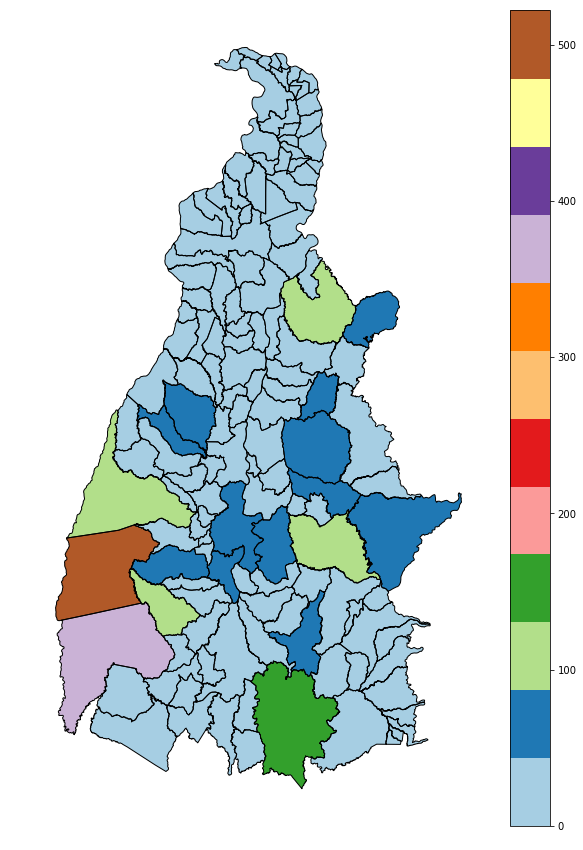

In [18]:
fig, ax = plt.subplots(1, figsize=(10, 15))
focos_municipios.plot(column='focos', ax=ax, cmap='Paired')
municipios_tocantins.plot(color='None', edgecolor='black', linewidth=1, ax=ax)
ax.axis('off')
vmin = focos_municipios['focos'].min()
vmax = focos_municipios['focos'].max()

# criando barra de cores
barra = plt.cm.ScalarMappable(cmap='Paired', norm=plt.Normalize(vmin=vmin, vmax=vmax))
barra._A = []
cbar = fig.colorbar(barra)


<font size="3" face="Times"><h1 style="color:black">Referencia:
<font size="2" face="Times"><h1 style="color:blue"> http://www.geraintianpalmer.org.uk/2017/09/22/plotting-geopandas/